In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("AmesHousing.csv")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
df = df.drop(columns=['PID', 'Order'], errors='ignore')

In [5]:
threshold = len(df) * 0.4
df = df.dropna(thresh=threshold, axis=1)
df = df.fillna(df.median(numeric_only=True))
df = df.fillna('None')  

In [6]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [7]:
X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded['SalePrice']
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [8]:
alpha = 0.1  
model = Lasso(alpha=alpha, max_iter=1000)
model.fit(X_scaled, y)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.624e+11, tolerance: 1.869e+09
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [9]:
coeffs = pd.Series(model.coef_, index=X_scaled.columns)
top_15_idx = coeffs.abs().sort_values(ascending=False).head(15).index
top_15_real = coeffs.loc[top_15_idx]
top_15_real = top_15_real.sort_values()  
print("Top 15 most influential variables:")
print(top_15_real)

Top 15 most influential variables:
Garage Qual_TA      -21400.763352
Garage Cond_None    -14419.029323
Garage Qual_Fa      -13882.762467
Exter Qual_TA       -12726.479489
Exter Qual_Gd       -11690.637990
Roof Matl_Metal      12152.307639
Roof Matl_Membran    12358.112771
BsmtFin SF 1         13578.632571
1st Flr SF           14661.647433
Garage Cond_TA       15616.269694
2nd Flr SF           22878.416826
Roof Matl_WdShngl    32650.313161
Roof Matl_WdShake    33710.473119
Roof Matl_Tar&Grv    54676.723471
Roof Matl_CompShg    73044.665945
dtype: float64


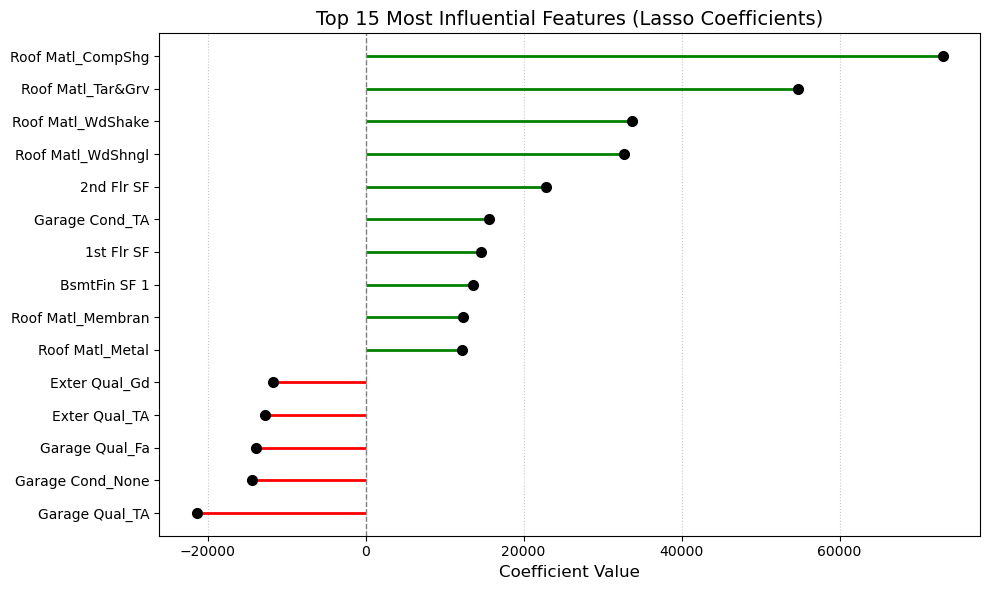

In [ ]:
top_15_idx = coeffs[coeffs != 0].abs().sort_values(ascending=False).head(15).index
top_15_real = coeffs.loc[top_15_idx]
top_15_real = top_15_real.sort_values() 


plt.figure(figsize=(10, 6))
plt.hlines(y=top_15_real.index, xmin=0, xmax=top_15_real.values, 
           color=np.where(top_15_real.values > 0, 'green', 'red'), linewidth=2)
plt.plot(top_15_real.values, top_15_real.index, 'o', 
         color='black', markersize=7)

plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
plt.title("Top 15 Most Influential Features (Lasso Coefficients)", fontsize=14)
plt.xlabel("Coefficient Value", fontsize=12)
plt.grid(axis='x', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()